# $\text{Imported Libraries}$

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
%matplotlib inline

# $\text{Convolution}$

In [2]:
def gaussian_2d(x,y,sigma):
    s = 1/(2*np.pi*(sigma**2))
    return s*np.exp(-(x**2+y**2)/(2*sigma**2))
x = np.linspace(-10,10,64,endpoint=True)
y = np.linspace(-10,10,64,endpoint=True)

X, Y = np.meshgrid(x, y)
z = gaussian_2d(X,Y,3)

mean = np.mean(z)
variance = np.var(z)
print(mean, variance)


0.0024190732883586684 1.5567487391602177e-05


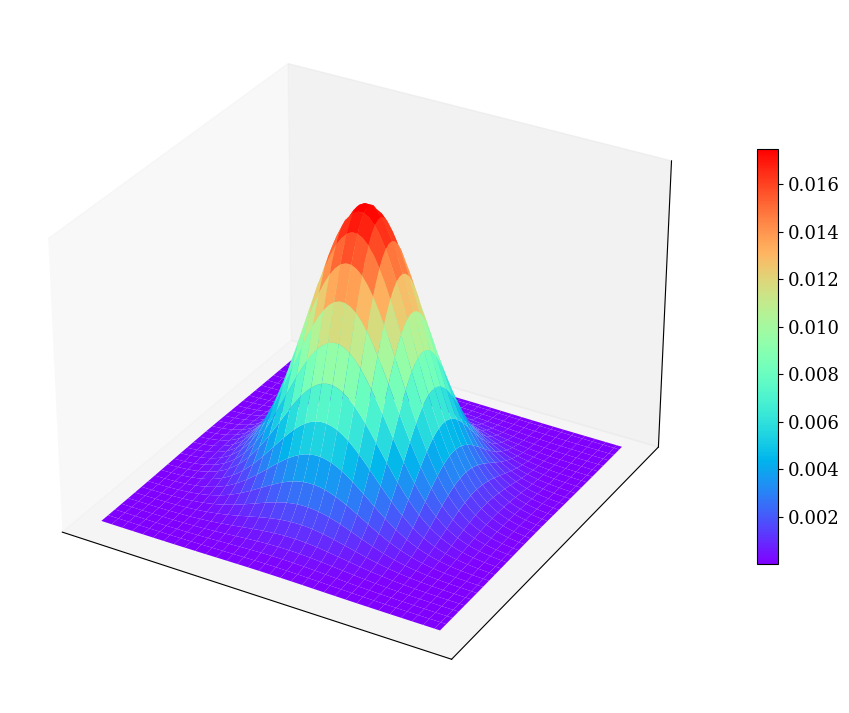

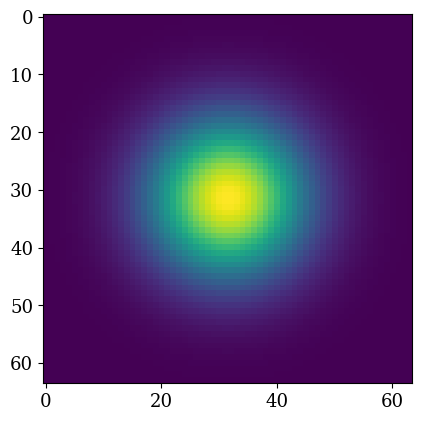

In [6]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

image = ax.plot_surface(X, Y, z,cmap = 'rainbow')
plt.colorbar(image,shrink = 0.6)


ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


plt.show()

plt.imshow(z, cmap='viridis')
plt.show()

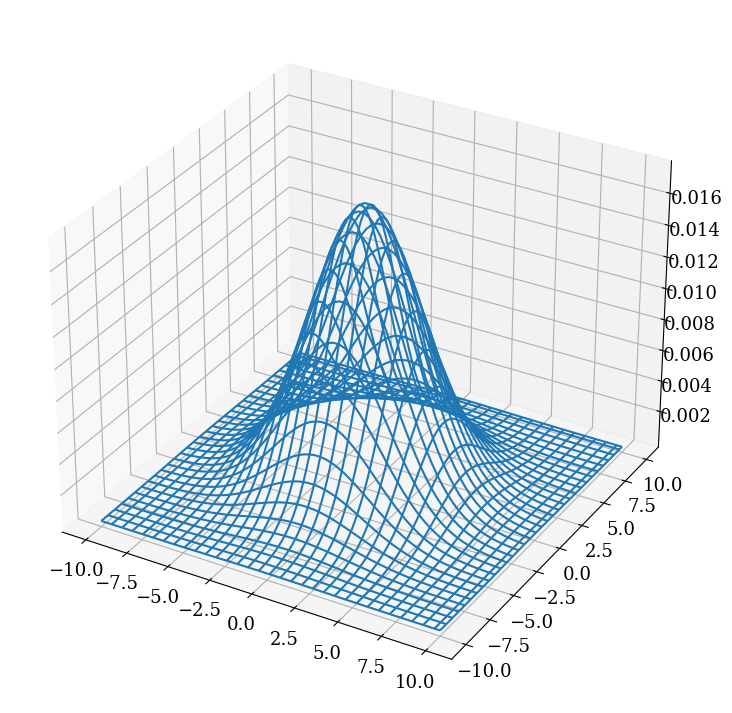

In [39]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

image = ax.plot_wireframe(X, Y, z,cmap = 'rainbow')

plt.show()

In [40]:
# fourier_z = (np.fft.fft2(z, s=None, norm=None))
fourier_z = abs(np.fft.fftshift(np.fft.fft2(z, s=None, norm=None)))

# fourier_z = abs((np.fft.fft2(z, s=None, norm=None)))

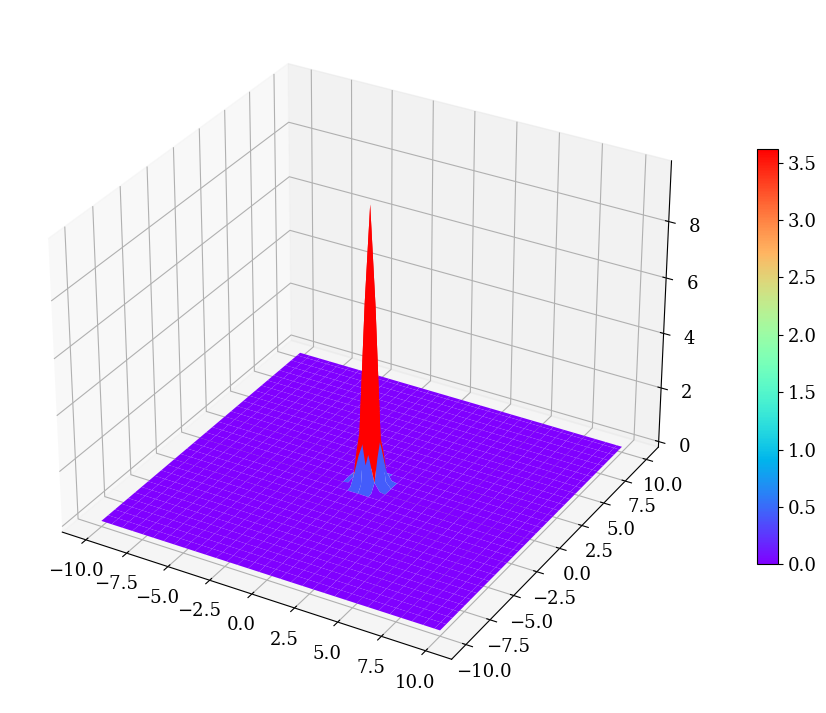

In [41]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.plot_surface(X, Y, fourier_z,cmap = 'rainbow')
plt.colorbar(image,shrink = 0.6)

plt.show()
# plt.imshow(fourier_z, cmap='viridis')

In [15]:
size = 64

# Create a 2D array with zeros everywhere
new_array = np.zeros((size, size))

# Define a 2x2 matrix to insert
insert_matrix = np.ones([2,2])

# Compute the center of the array
center = size // 2

# Insert the 2x2 matrix at the center of the array using a for loop
for i in range(2):
    for j in range(2):
        new_array[center-1+i, center-1+j] = insert_matrix[i, j]


fourier_new_array = np.fft.fft2(new_array)
shifted_array = abs(np.fft.fftshift(fourier_new_array))

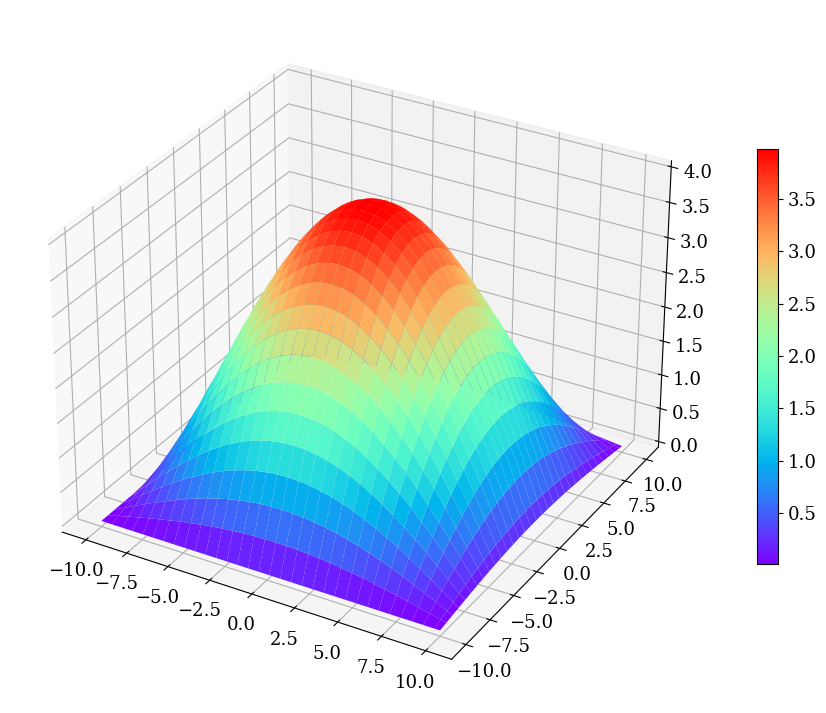

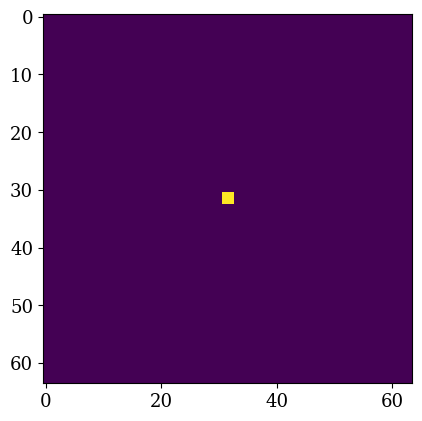

In [17]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.plot_surface(X, Y, shifted_array,cmap = 'rainbow')
plt.colorbar(image,shrink = 0.6)

plt.show()
plt.imshow(new_array, cmap='viridis')

In [18]:
multiplied_array = shifted_array*fourier_z

Inverse_fourier = abs(np.fft.fftshift(np.fft.ifft2(multiplied_array)))

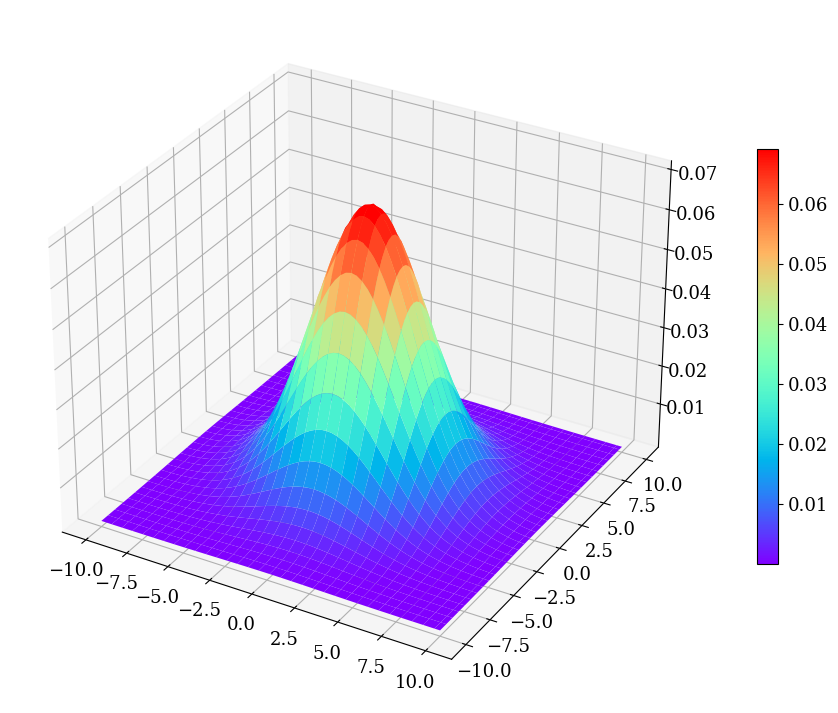

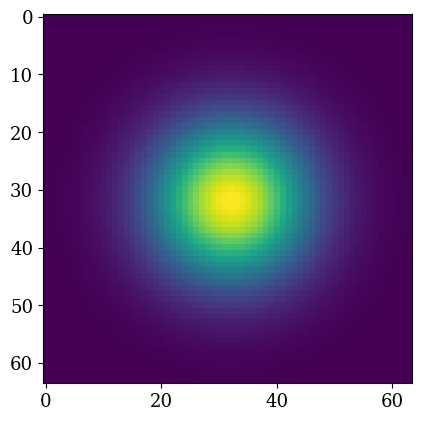

In [19]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.plot_surface(X, Y, Inverse_fourier,cmap = 'rainbow')
plt.colorbar(image,shrink = 0.6)

plt.show()

plt.imshow(Inverse_fourier, cmap='viridis')


In [20]:
mean1 = np.mean(Inverse_fourier)
variance1 = np.var(Inverse_fourier)
print(mean1,variance1)

0.009676293153434674 0.0002481224547143721


# $\text{Project}$

## $\text{1. Gaussian Random Field }$

In [21]:
def Gauss_random_field(mean,var,grid_size):
    field = np.random.normal(mean,var,size=(grid_size,grid_size,grid_size))
    return field

grid_size = 64
gaussian_field = Gauss_random_field(10,2,grid_size)
# Create a 3D coordinate system centered at (0, 0, 0)
x_array = np.linspace(-10,10, grid_size)
y_array = np.linspace(-10,10, grid_size)
z_array = np.linspace(-10,10, grid_size)
x_mesgrid,y_mesgrid,z_mesgrid = np.meshgrid(x_array,y_array,z_array)

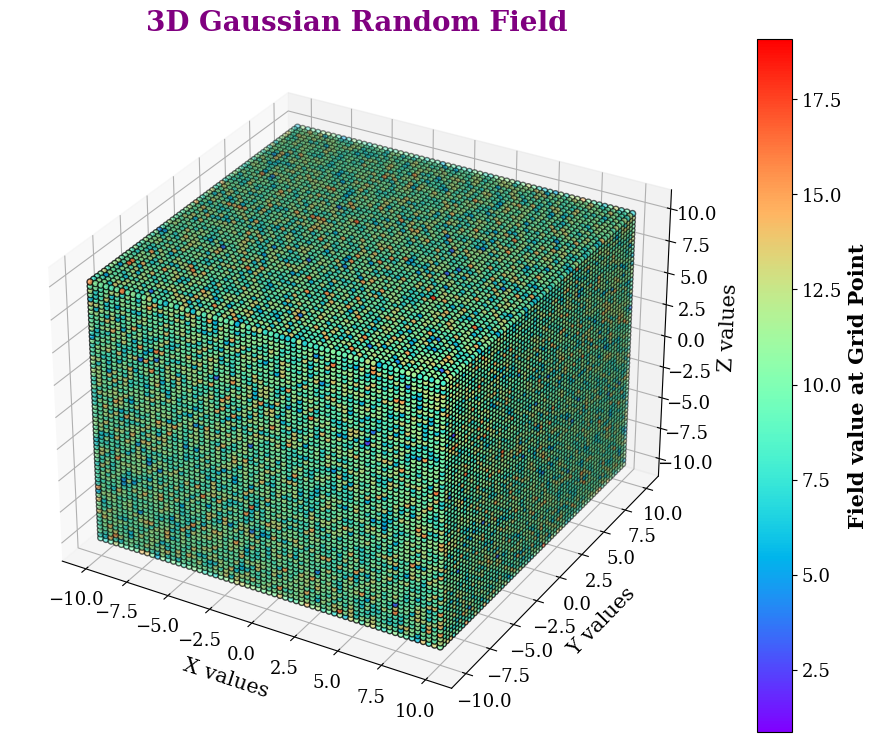

In [22]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.scatter(x_mesgrid, y_mesgrid,z_mesgrid,c=gaussian_field,cmap = 'rainbow',edgecolors='black')
ax.set_title("3D Gaussian Random Field",fontsize=20,color='purple',weight = 'bold')
k=plt.colorbar(image)
k.set_label(label='Field value at Grid Point',size=15,weight='bold')
ax.set_xlabel('X values', fontsize=15,labelpad=7.5)
ax.set_ylabel('Y values', fontsize=15,labelpad=7.5)
ax.set_zlabel('Z values', fontsize=15,labelpad=7.5)

plt.show()




### $\text{2D-Slices of Gaussian Random Fiend}$

<Figure size 640x480 with 0 Axes>

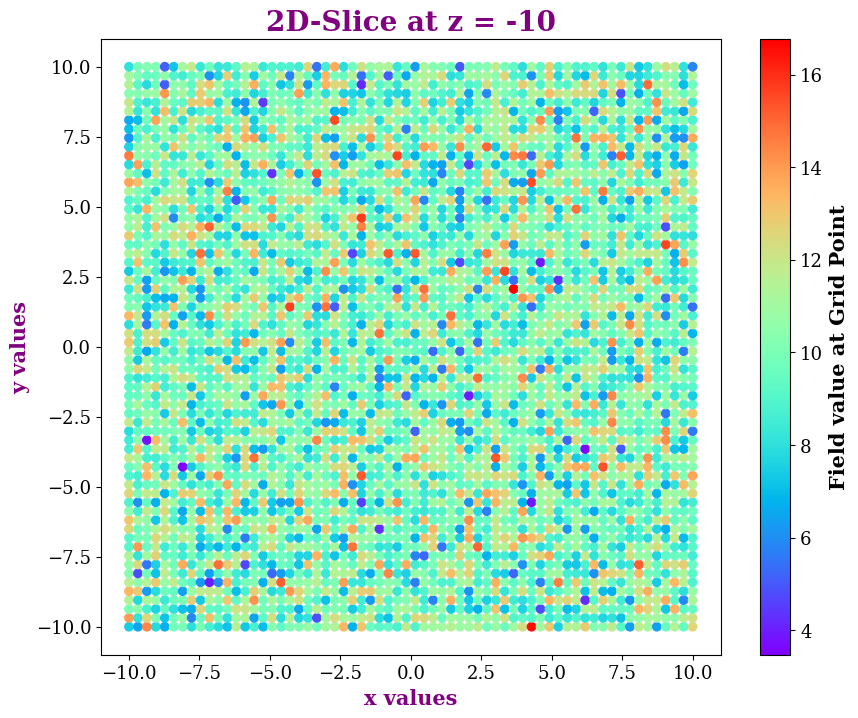

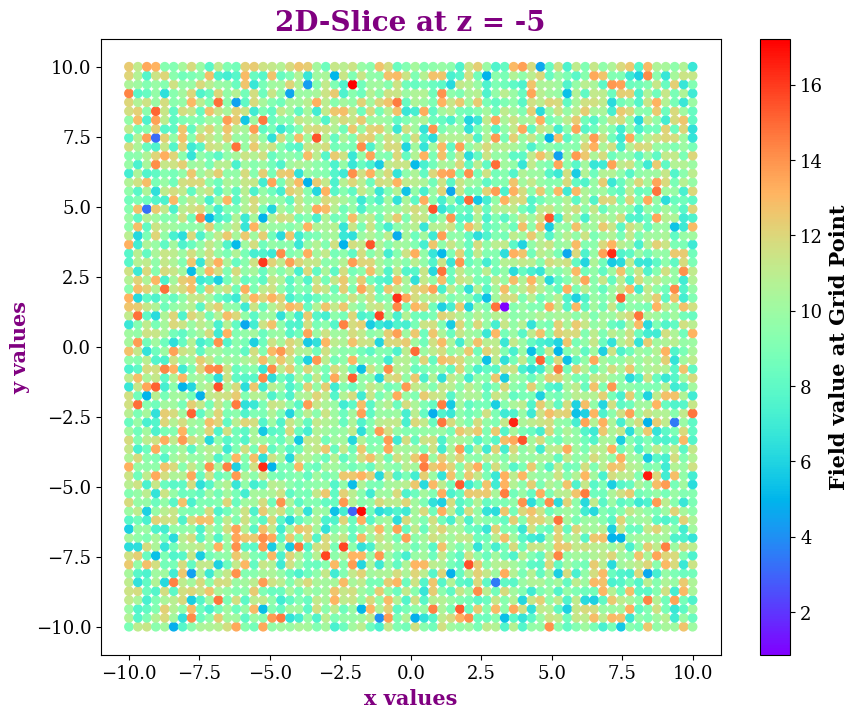

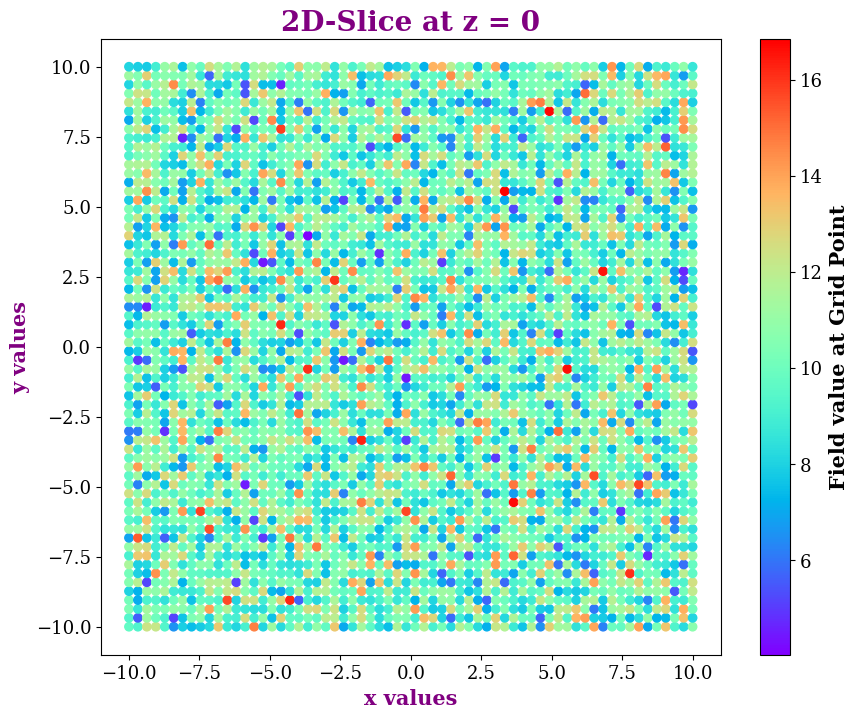

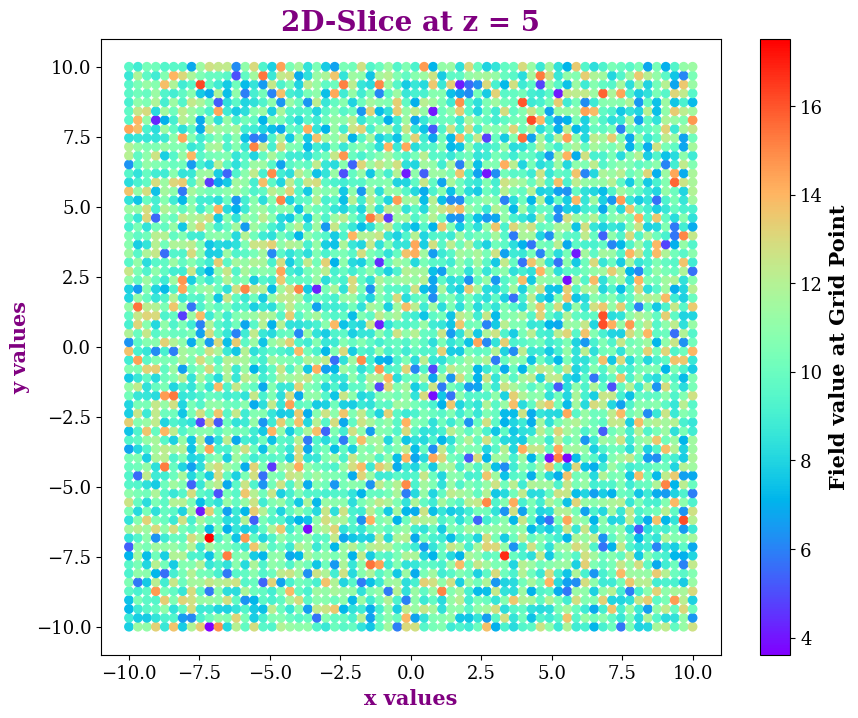

In [23]:
# fig,ax = plt.subplots(5,1,figsize=(10,35))

cm = plt.cm.get_cmap('rainbow')
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.95)
X,Y = np.meshgrid(x_array,y_array)

z_slice = np.linspace(1,64,5)
z_2d_slice = np.linspace(-10,10,5)

for i in range(len(z_slice)-1):
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_xlabel('x values', fontsize=15,color='purple',weight = 'bold')
    ax.set_ylabel('y values', fontsize=15,color='purple',weight = 'bold')
    s = ax.scatter(X, Y, c=gaussian_field[:,:,int(z_slice[i])], cmap=cm, alpha=1)
    ax.set_title("2D-Slice at z = %d"%int(z_2d_slice[i]),fontsize=20,color='purple',weight = 'bold')
    k = plt.colorbar(s)
    k.set_label(label='Field value at Grid Point',size=15,weight='bold')
    plt.show()

## $\text{2. Generate a 3D-Sphere}$

In [1]:
def sphere_condition(radius):
    condition = (x_mesgrid ** 2 + y_mesgrid ** 2 + z_mesgrid ** 2) <= radius**2
    return condition

def spherical(radius):
    field = np.zeros([64,64,64])
    field[sphere_condition(radius)] = 1
    field[~sphere_condition(radius)] = 0
    return field


### $\text{Visualization of sphere}$

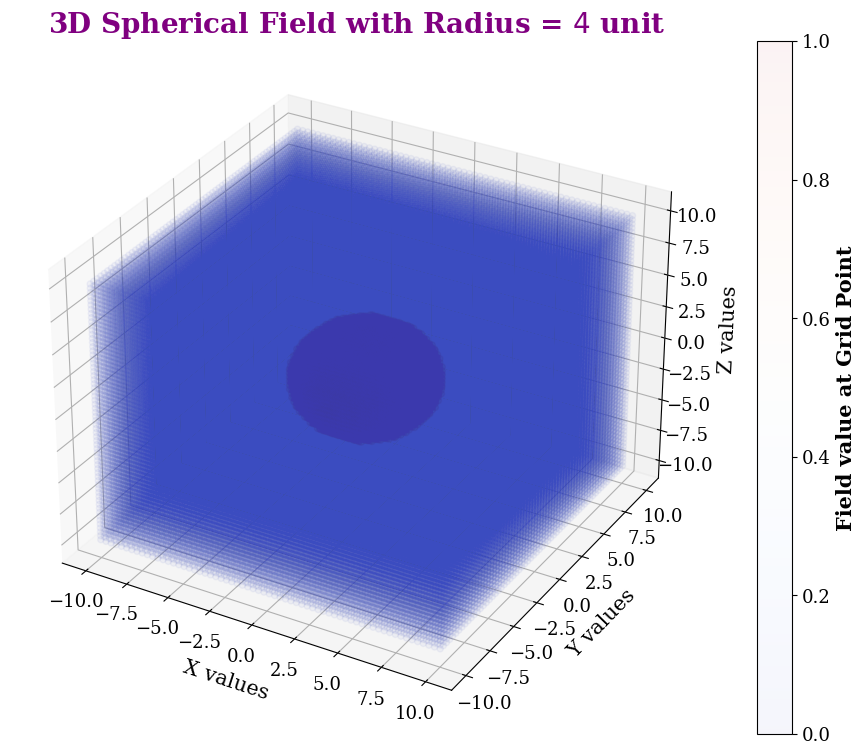

In [25]:
field_sphere_test = spherical(4)
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.scatter(x_mesgrid, y_mesgrid,z_mesgrid,c=field_sphere_test,cmap = 'coolwarm',alpha = 0.05)
ax.set_title("3D Spherical Field with Radius = $4$ unit",fontsize=20,color='purple',weight = 'bold')
k=plt.colorbar(image)
k.set_label(label='Field value at Grid Point',size=15,weight='bold')
ax.set_xlabel('X values', fontsize=15,labelpad=7.5)
ax.set_ylabel('Y values', fontsize=15,labelpad=7.5)
ax.set_zlabel('Z values', fontsize=15,labelpad=7.5)

plt.show()

### $\text{2D Slices of Spherical Field}$

In [ ]:
## sphere of r = 1
field_sphere = spherical(1)
    
sp_min, sp_max = np.abs(field_sphere).min(), np.abs(field_sphere).max()


z_slice_2d = [28,29,30,31,32,33,34,35,36]

X,Y = np.meshgrid(x_array,y_array)

fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(17,28),dpi=100)
for ax,z in zip(axes.flat,z_slice_2d):
    im = ax.imshow(field_sphere[:,:,z], cmap='rainbow', vmin=sp_min, vmax=sp_max,
                   alpha=1)
    ax.set_title("$z =$ %.f units" %z,size=14)
    ax.set_xlabel("$x$ values $\longrightarrow$",size=15,labelpad=7.5)
    ax.set_ylabel("$y$ values $\longrightarrow$",size=15,labelpad=7.5)
color = fig.colorbar(im, ax=axes.ravel().tolist(),aspect=15,shrink=0.95)
color.set_label("Field Intensity",size=15)
plt.suptitle("2D Slice of Spherical Field of Radius $r$ = $1$ unit",x=0.475,y=0.91,size=22)

plt.show()


## $\text{3. Convolution part}$

In [27]:
def convolution(A,B):
    fourier_A = abs(np.fft.fftshift(np.fft.fftn(A)))
    fourier_B = abs(np.fft.fftshift(np.fft.fftn(B)))
    product_field = fourier_A*fourier_B
    bft_field = abs(np.fft.fftshift(np.fft.ifftn(product_field)))
    return bft_field

### now we will found convolute field of both field
smoothed_field = convolution(gaussian_field,field_sphere)

### $\text{Smoothing of Random Gaussian Field}$

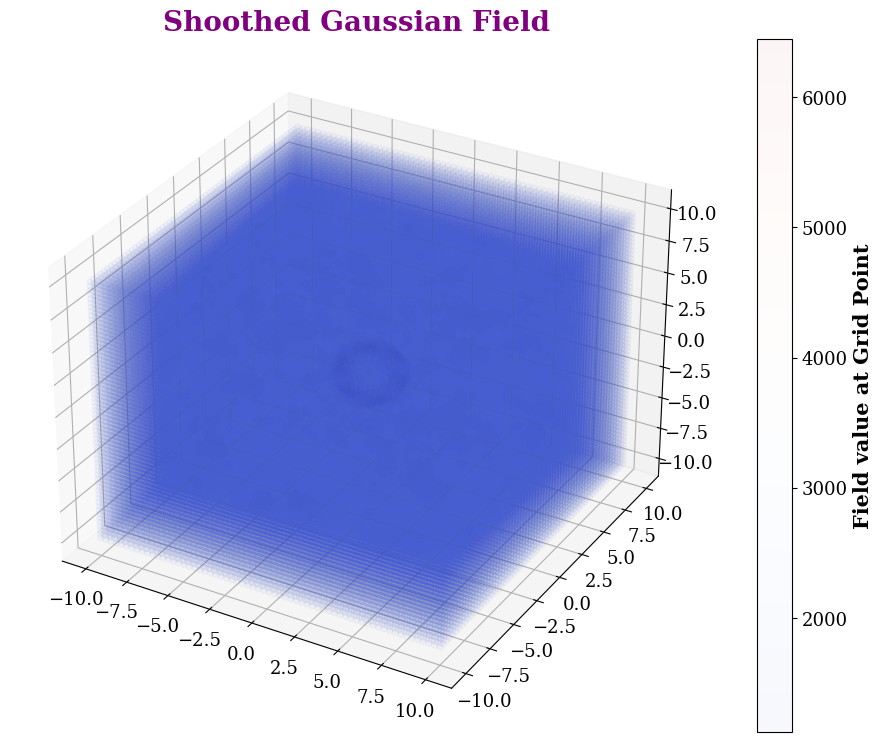

In [28]:
plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
image = ax.scatter(x_mesgrid, y_mesgrid,z_mesgrid,c=smoothed_field,cmap = 'coolwarm',alpha = 0.04)
ax.set_title("Shoothed Gaussian Field",fontsize=20,color='purple',weight = 'bold')
k=plt.colorbar(image)
k.set_label(label='Field value at Grid Point',size=15,weight='bold')


plt.show()

### $\text{2D-Slices of Smoothed Gaussian Field}$

In [ ]:
cm = plt.cm.get_cmap('jet')
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.95)

X,Y = np.meshgrid(x_array,y_array)

z_slice = np.linspace(0,64,10)   #### for slices
z_2d_slice = np.linspace(-10,10,10)  #### for exact value of z

for i in range(len(z_slice)-1):
    fig,ax = plt.subplots(figsize=(10,8))
    ax.set_xlabel('x values', fontsize=15,color='purple',weight = 'bold')
    ax.set_ylabel('y values', fontsize=15,color='purple',weight = 'bold')
    s = ax.scatter(X, Y, c=smoothed_field[:,:,int(z_slice[i])], cmap=cm, alpha=1)
    ax.set_title("2D-Slice at z = %d"%int(z_2d_slice[i]),fontsize=20,color='purple',weight = 'bold')
    k = plt.colorbar(s)
    k.set_label(label='Field value at Grid Point',size=15,weight='bold')
    plt.show()

## $\text{4. Field for different smoothig radius}$

In [195]:
#### array for different radius
size = 64
radius_array = np.linspace(1,size/2,32,endpoint=True)

## array for  sperical field at different radius
spherical_field = np.zeros(32,dtype=object)
for i in range(len(radius_array)):
    spherical_field[i] = spherical(i)
    

In [196]:
### final smoothed fields at different radius
Final_smoothed_field = np.zeros(32,dtype = object)
for i in range(len(radius_array)):
    Final_smoothed_field[i] = convolution(gaussian_field,spherical_field[i])

### $\text{Now we are going to plot smoothed gaussian field with different radius. }$
### $\text{We can see that after certain value of radius variance in field become zero. }$
### $\text{This section are clearly show this variation.}$

### $\text{2D-slices and 3D-plots at different z values for different smoothing radius r}$

In [ ]:
cm = plt.cm.get_cmap('jet')
plt.subplots_adjust(bottom=0.1, right=0.9, top=0.95)
X,Y = np.meshgrid(x_array,y_array)

z_slice = np.linspace(0,64,5)
z_2d_slice = np.linspace(-10,10,5)

for i in range(len(radius_array)-9):
    fig.text(0.5, 0.1, "Text between plots", ha='center', fontsize=14)
    for j in range(len(z_slice)-1):
        
        fig,ax = plt.subplots(figsize=(10,8))
        ax.set_xlabel('x values', fontsize=15,color='purple',weight = 'bold')
        ax.set_ylabel('y values', fontsize=15,color='purple',weight = 'bold')
        s = ax.scatter(X, Y, c=Final_smoothed_field[i][:,:,int(z_slice[j])], cmap=cm, alpha=1)
        ax.set_title("2D-Slice at z = %d with Smoothing Radius $r$ = %d unit"
                     %(int(z_2d_slice[j]),radius_array[i]-1),
                     fontsize=17,color='purple',weight = 'bold',x=0.5,y=1.0)
        k = plt.colorbar(s)
        k.set_label(label='Field value at Grid Point',size=15,weight='bold')
        plt.show()
        
    ## 3D plot of smoothed field
    plt.figure(figsize =(10,8))
    ax = plt.axes(projection ='3d')

    image = ax.plot_surface(X, Y, Final_smoothed_field[i][:,:,35],cmap = 'rainbow')
    plt.colorbar(image)
    ax.set_xlabel('x values', fontsize=15,color='purple',weight = 'bold')
    ax.set_ylabel('y values', fontsize=15,color='purple',weight = 'bold')
    ax.set_title("3D-Plot of Smoothed Gaussian at z = 1 with Smoothing Radius $r$ = %d unit"
                 %(radius_array[i]-1),fontsize=17,color='purple',weight = 'bold',x=0.5,y=1.15)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])


    plt.show()

    plt.imshow(Final_smoothed_field[i][:,:,35], cmap='viridis')
    plt.show()
        

## $\text{5. Mean and Variance as increasing smoothing radius r }$

In [197]:
mean_final_field = np.zeros(32)
variance_final_field = np.zeros(32)
for i in range(len(Final_smoothed_field)):
    mean_final_field[i] = np.mean(Final_smoothed_field[i])
    variance_final_field[i] = np.var(Final_smoothed_field[i])
    

/tmp/ipykernel_4381/3681641277.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--o" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(radius_array,mean_final_field,'--o',color='purple',markerfacecolor='black',lw = 2,ls = '--')


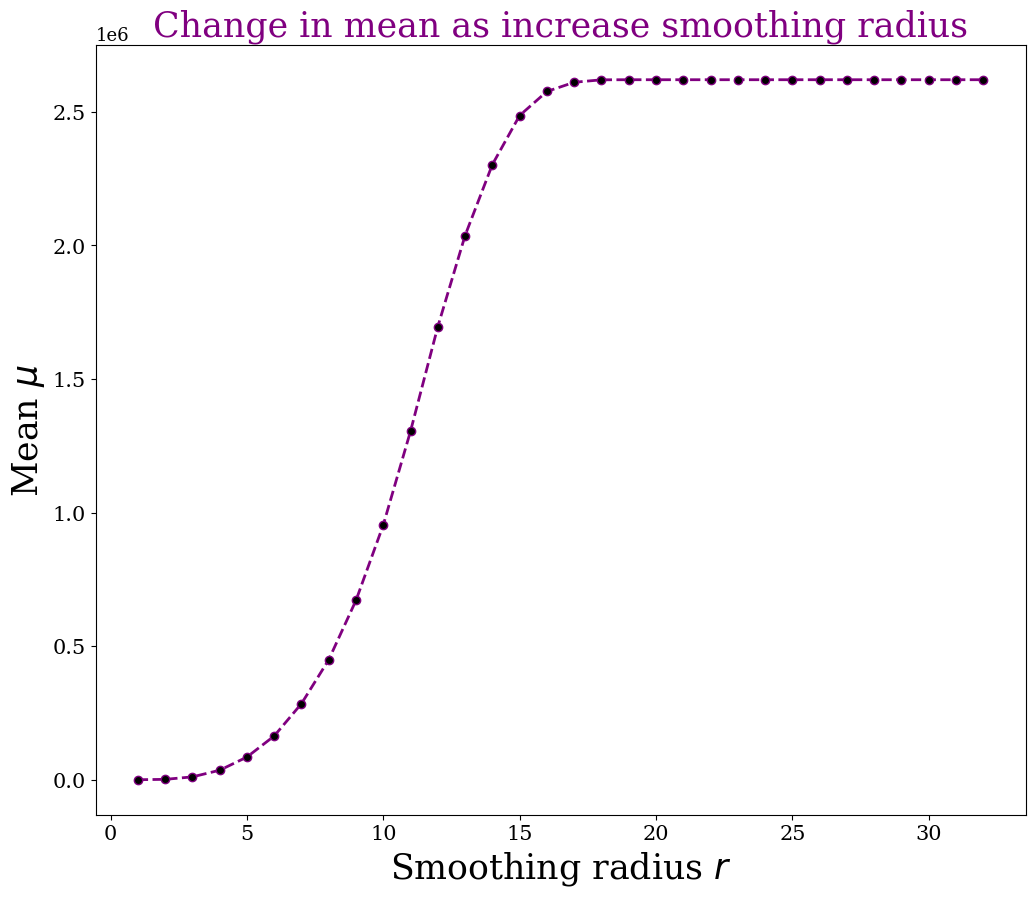

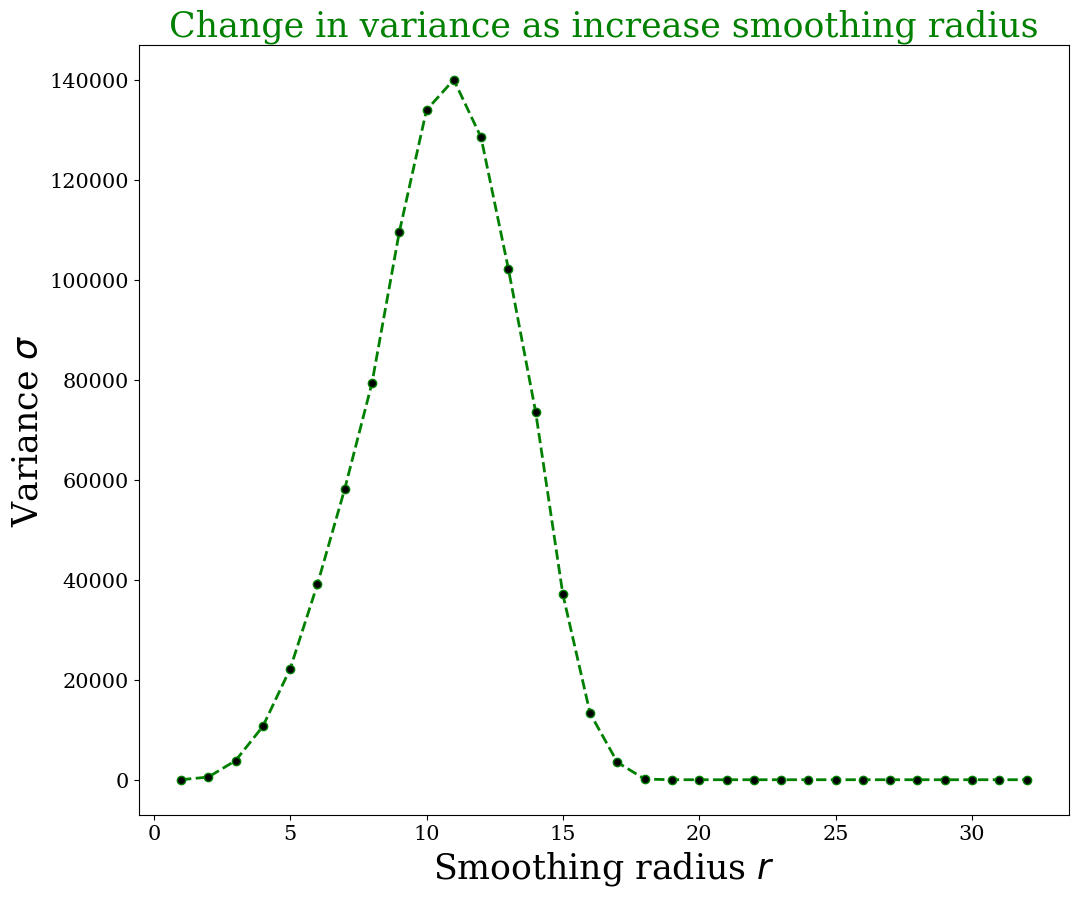

In [199]:
plt.figure(figsize=(12,10))
plt.plot(radius_array,mean_final_field,'--o',color='purple',markerfacecolor='black',lw = 2,ls = '--')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Smoothing radius $r$',fontsize = 25)
plt.ylabel('Mean $\mu$',fontsize = 25)
plt.title('Change in mean as increase smoothing radius',fontsize = 25,color = 'purple')
plt.show()

plt.figure(figsize=(12,10))
plt.plot(radius_array,variance_final_field,'--o',color = 'green',markerfacecolor='black',lw = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Smoothing radius $r$',fontsize = 25)
plt.ylabel('Variance $\sigma$',fontsize = 25)
plt.title('Change in variance as increase smoothing radius',fontsize = 25,color = 'green')

plt.show()